<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/PRACTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones de la imagen después de la iteración 1: (180, 113)
Dimensiones de la imagen después de la iteración 2: (108, 68)
Dimensiones de la imagen después de la iteración 3: (65, 41)
Dimensiones de la imagen después de la iteración 4: (39, 25)
Dimensiones de la imagen después de la iteración 5: (23, 15)
Dimensiones de la imagen después de la iteración 6: (14, 9)
Valores de píxeles con índices después de convoluciones y pooling:
Pixel (0, 0): 0
Pixel (0, 1): 0
Pixel (0, 2): 207
Pixel (0, 3): 5
Pixel (0, 4): 0
Pixel (0, 5): 2
Pixel (0, 6): 13
Pixel (0, 7): 2
Pixel (0, 8): 35
Pixel (1, 0): 0
Pixel (1, 1): 154
Pixel (1, 2): 85
Pixel (1, 3): 158
Pixel (1, 4): 29
Pixel (1, 5): 4
Pixel (1, 6): 85
Pixel (1, 7): 0
Pixel (1, 8): 41
Pixel (2, 0): 0
Pixel (2, 1): 89
Pixel (2, 2): 85
Pixel (2, 3): 155
Pixel (2, 4): 30
Pixel (2, 5): 16
Pixel (2, 6): 5
Pixel (2, 7): 255


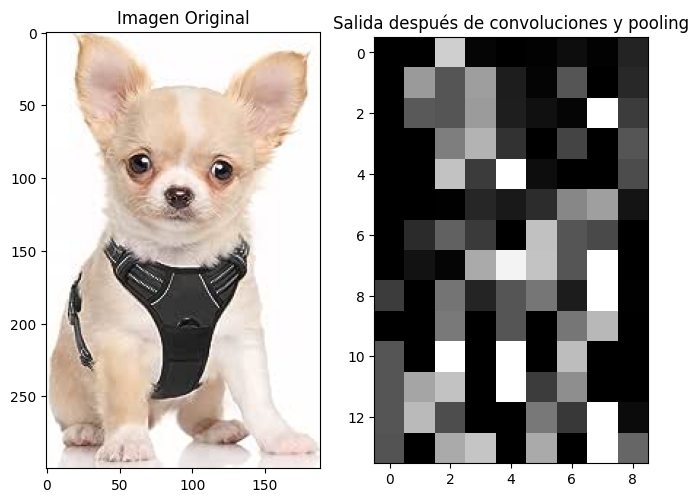

In [27]:

from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt



# Cargar la imagen
imagen_path = "/content/drive/MyDrive/druida/chucho.jpg"
imagen = cv2.imread(imagen_path)

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Definir el kernel de convolución
#kernel = np.ones((3, 3), np.float32)/8
kernel= np.array([
    [1, 0, -1],
    [2, 0.7, -2],
    [-1, 1, -1]
], np.float32)
# Función para imprimir los valores de los píxeles con índices
def imprimir_valores_pixels_con_indices(imagen):
    alto, ancho = imagen.shape
    for i in range(alto):
        for j in range(ancho):
            print(f"Pixel ({i}, {j}): {imagen[i, j]}")

# Aplicar 8 convoluciones seguidas de max pooling
for i in range(6):
    imagen_gris = cv2.filter2D(imagen_gris, -1, kernel)
    imagen_gris = cv2.resize(imagen_gris, (0, 0), fx=0.6, fy=0.6, interpolation=cv2.INTER_LINEAR)
    print(f'Dimensiones de la imagen después de la iteración {i + 1}: {imagen_gris.shape}')

# Imprimir valores de píxeles con índices después de todas las iteraciones
print("Valores de píxeles con índices después de convoluciones y pooling:")
imprimir_valores_pixels_con_indices(imagen_gris)

# Mostrar la imagen original y la salida después de convoluciones y pooling
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Salida después de convoluciones y pooling')

plt.show()